In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls

In [ ]:
import zipfile

# Ekstrak zip
local_zip = 'gdrive/My Drive/balilandmark2.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/content/balilandmark2'

In [ ]:
# Lihat isi folder 
os.listdir(base_dir)

In [ ]:
# Lihat jumlah file dalam setiap folder
total = 0
for c in ['Vihara Dharma Giri', 'Tanah Lot', 'Patung Satria Gatotkaca','Bedugul', 'Monumen Bajra Sandi', 'Patung Nakula Sadewa', 'Patung Dewa Ruci', 'Garuda Wisnu Kencana', 'Ground Zero']:
  dir = f'{base_dir}/{c}'
  length = len(os.listdir(dir))
  print(f"Jumlah gambar {c}: {length}")
  total += length

print(f"Total gambar: {total}")

In [ ]:
# Buat folder baru: train dan val
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

if not os.path.exists(train_dir):
  os.mkdir(train_dir)
if not os.path.exists(val_dir):
  os.mkdir(val_dir)

In [ ]:
# Cek apakah folder train dan val sudah dibuat
os.listdir(base_dir)

In [ ]:
gwk_dir = os.path.join(base_dir, 'Garuda Wisnu Kencana')
tanahlot_dir = os.path.join(base_dir, 'Tanah Lot')
bajrasandhi_dir = os.path.join(base_dir, 'Monumen Bajra Sandi')
bedugul_dir = os.path.join(base_dir, 'Bedugul')
gz_dir = os.path.join(base_dir, 'Ground Zero')
pdr_dir = os.path.join(base_dir, 'Patung Dewa Ruci')
pns_dir = os.path.join(base_dir, 'Patung Nakula Sadewa')
psg_dir = os.path.join(base_dir, 'Patung Satria Gatotkaca')
vdg_dir = os.path.join(base_dir, 'Vihara Dharma Giri')

In [ ]:
# Split gambar ke dalam train dan val
train_gwk_split, val_gwk_split = train_test_split(os.listdir(gwk_dir), test_size=0.2, random_state=42)
train_tanahlot_split, val_tanahlot_split = train_test_split(os.listdir(tanahlot_dir), test_size=0.2, random_state=42)
train_bajrasandhi_split, val_bajrasandhi_split = train_test_split(os.listdir(bajrasandhi_dir), test_size=0.2, random_state=42)
train_bedugul_split, val_bedugul_split = train_test_split(os.listdir(bedugul_dir), test_size=0.2, random_state=42)
train_gz_split, val_gz_split = train_test_split(os.listdir(gz_dir), test_size=0.2, random_state=42)
train_pdr_split, val_pdr_split = train_test_split(os.listdir(pdr_dir), test_size=0.2, random_state=42)
train_pns_split, val_pns_split = train_test_split(os.listdir(pns_dir), test_size=0.2, random_state=42)
train_psg_split, val_psg_split = train_test_split(os.listdir(psg_dir), test_size=0.2, random_state=42)
train_vdg_split, val_vdg_split = train_test_split(os.listdir(vdg_dir), test_size=0.2, random_state=42)

In [ ]:
print("Bedugul trains:", train_bedugul_split[:5])
print("Bedugul vals:", val_bedugul_split[:5])

In [ ]:
# Buat folder untuk masing-masing kelas di dalam folder train dan val
train_gwk_dir = os.path.join(train_dir, 'Garuda Wisnu Kencana')
train_tanahlot_dir = os.path.join(train_dir, 'Tanah Lot')
train_bajrasandhi_dir = os.path.join(train_dir, 'Monumen Bajra Sandi')
train_bedugul_dir = os.path.join(train_dir, 'Bedugul')
train_gz_dir = os.path.join(train_dir, 'Ground Zero')
train_pdr_dir = os.path.join(train_dir, 'Patung Dewa Ruci')
train_pns_dir = os.path.join(train_dir, 'Patung Nakula Sadewa')
train_psg_dir = os.path.join(train_dir, 'Patung Satria Gatotkaca')
train_vdg_dir = os.path.join(train_dir, 'Vihara Dharma Giri')

val_gwk_dir = os.path.join(val_dir, 'Garuda Wisnu Kencana')
val_tanahlot_dir = os.path.join(val_dir, 'Tanah Lot')
val_bajrasandhi_dir = os.path.join(val_dir, 'Monumen Bajra Sandi')
val_bedugul_dir = os.path.join(val_dir, 'Bedugul')
val_gz_dir = os.path.join(val_dir, 'Ground Zero')
val_pdr_dir = os.path.join(val_dir, 'Patung Dewa Ruci')
val_pns_dir = os.path.join(val_dir, 'Patung Nakula Sadewa')
val_psg_dir = os.path.join(val_dir, 'Patung Satria Gatotkaca')
val_vdg_dir = os.path.join(val_dir, 'Vihara Dharma Giri')

In [ ]:
# Jika belum ada, buat folder untuk masing-masing kelas di dalam folder train dan val
if not os.path.exists(train_gwk_dir):
  os.mkdir(train_gwk_dir)
if not os.path.exists(train_tanahlot_dir):
  os.mkdir(train_tanahlot_dir)
if not os.path.exists(train_bajrasandhi_dir):
  os.mkdir(train_bajrasandhi_dir)
if not os.path.exists(train_bedugul_dir):
  os.mkdir(train_bedugul_dir)
if not os.path.exists(train_gz_dir):
  os.mkdir(train_gz_dir)
if not os.path.exists(train_pdr_dir):
  os.mkdir(train_pdr_dir)
if not os.path.exists(train_pns_dir):
  os.mkdir(train_pns_dir)
if not os.path.exists(train_psg_dir):
  os.mkdir(train_psg_dir)
if not os.path.exists(train_vdg_dir):
  os.mkdir(train_vdg_dir)



if not os.path.exists(val_gwk_dir):
  os.mkdir(val_gwk_dir)
if not os.path.exists(val_tanahlot_dir):
  os.mkdir(val_tanahlot_dir)
if not os.path.exists(val_bajrasandhi_dir):
  os.mkdir(val_bajrasandhi_dir)
if not os.path.exists(val_bedugul_dir):
  os.mkdir(val_bedugul_dir)
if not os.path.exists(val_gz_dir):
  os.mkdir(val_gz_dir)
if not os.path.exists(val_pdr_dir):
  os.mkdir(val_pdr_dir)
if not os.path.exists(val_pns_dir):
  os.mkdir(val_pns_dir)
if not os.path.exists(val_psg_dir):
  os.mkdir(val_psg_dir)
if not os.path.exists(val_vdg_dir):
  os.mkdir(val_vdg_dir)

In [ ]:
print("Train directories:", os.listdir(train_dir))
print("Validation directories:", os.listdir(val_dir))

In [ ]:
# Copy file gambar ke dalam folder train dan val
for file in train_gwk_split:
  shutil.copy(os.path.join(gwk_dir, file), os.path.join(train_gwk_dir, file))
for file in train_tanahlot_split:
  shutil.copy(os.path.join(tanahlot_dir, file), os.path.join(train_tanahlot_dir, file))
for file in train_bajrasandhi_split:
  shutil.copy(os.path.join(bajrasandhi_dir, file), os.path.join(train_bajrasandhi_dir, file))
for file in train_bedugul_split:
  shutil.copy(os.path.join(bedugul_dir, file), os.path.join(train_bedugul_dir, file))
for file in train_gz_split:
  shutil.copy(os.path.join(gz_dir, file), os.path.join(train_gz_dir, file))
for file in train_pdr_split:
  shutil.copy(os.path.join(pdr_dir, file), os.path.join(train_pdr_dir, file))
for file in train_pns_split:
  shutil.copy(os.path.join(pns_dir, file), os.path.join(train_pns_dir, file))
for file in train_psg_split:
  shutil.copy(os.path.join(psg_dir, file), os.path.join(train_psg_dir, file))
for file in train_vdg_split:
  shutil.copy(os.path.join(vdg_dir, file), os.path.join(train_vdg_dir, file))



for file in val_gwk_split:
  shutil.copy(os.path.join(gwk_dir, file), os.path.join(val_gwk_dir, file))
for file in val_tanahlot_split:
  shutil.copy(os.path.join(tanahlot_dir, file), os.path.join(val_tanahlot_dir, file))
for file in val_bajrasandhi_split:
  shutil.copy(os.path.join(bajrasandhi_dir, file), os.path.join(val_bajrasandhi_dir, file))
for file in val_bedugul_split:
  shutil.copy(os.path.join(bedugul_dir, file), os.path.join(val_bedugul_dir, file))
for file in val_gz_split:
  shutil.copy(os.path.join(gz_dir, file), os.path.join(val_gz_dir, file))
for file in val_pdr_split:
  shutil.copy(os.path.join(pdr_dir, file), os.path.join(val_pdr_dir, file))
for file in val_pns_split:
  shutil.copy(os.path.join(pns_dir, file), os.path.join(val_pns_dir, file))
for file in val_psg_split:
  shutil.copy(os.path.join(psg_dir, file), os.path.join(val_psg_dir, file))
for file in val_vdg_split:
  shutil.copy(os.path.join(vdg_dir, file), os.path.join(val_vdg_dir, file))

In [ ]:
# Cek jumlah gambar dalam folder train dan val
print("Jumlah gambar train garuda wisnu kencana:", len(os.listdir(train_gwk_dir)))
print("Jumlah gambar train tanah lot:", len(os.listdir(train_tanahlot_dir)))
print("Jumlah gambar train monumen bajra sandhi:", len(os.listdir(train_bajrasandhi_dir)))
print("Jumlah gambar train bedugul:", len(os.listdir(train_bedugul_dir)))
print("Jumlah gambar train garuda wisnu kencana:", len(os.listdir(train_gz_dir)))
print("Jumlah gambar train tanah lot:", len(os.listdir(train_pdr_dir)))
print("Jumlah gambar train monumen bajra sandhi:", len(os.listdir(train_pns_dir)))
print("Jumlah gambar train bedugul:", len(os.listdir(train_psg_dir)))
print("Jumlah gambar train bedugul:", len(os.listdir(train_vdg_dir)))

print("Jumlah gambar val garuda wisnu kencana:", len(os.listdir(val_gwk_dir)))
print("Jumlah gambar val tanah lot:", len(os.listdir(val_tanahlot_dir)))
print("Jumlah gambar val monumen bajra sandhi:", len(os.listdir(val_bajrasandhi_dir)))
print("Jumlah gambar val bedugul:", len(os.listdir(val_bedugul_dir)))
print("Jumlah gambar val garuda wisnu kencana:", len(os.listdir(val_gz_dir)))
print("Jumlah gambar val tanah lot:", len(os.listdir(val_pdr_dir)))
print("Jumlah gambar val monumen bajra sandhi:", len(os.listdir(val_pns_dir)))
print("Jumlah gambar val bedugul:", len(os.listdir(val_psg_dir)))
print("Jumlah gambar val bedugul:", len(os.listdir(val_vdg_dir)))

# Data Preprocessing



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Melakukan normalisasi agar range pixel 0 - 1
# Melakukan data augmentation untuk menambah data latih dengan bentuk yang berbeda
# Seperti rotation, flop, shear
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    # shear_range = 0.2,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=1,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,    
        target_size=(224, 224),  
        # batch_size=4,
        class_mode='categorical') # Categorical karena class lebih dari 2

validation_generator = validation_datagen.flow_from_directory(
        val_dir, 
        target_size=(224, 224), 
        # batch_size=4, 
        class_mode='categorical')

# Modelling CNN

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(4, activation='softmax')
# ])
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      # steps_per_epoch=15,  
      epochs=25,
      validation_data=validation_generator,
      validation_steps=len(validation_generator))

Epoch 1/25
122/122 [==============================] - 95s 675ms/step - loss: 1.8850 - accuracy: 0.3571 - val_loss: 1.5074 - val_accuracy: 0.4728
Epoch 2/25
122/122 [==============================] - 85s 699ms/step - loss: 1.2908 - accuracy: 0.5665 - val_loss: 0.9677 - val_accuracy: 0.6495
Epoch 3/25
122/122 [==============================] - 76s 620ms/step - loss: 0.9547 - accuracy: 0.6810 - val_loss: 0.6534 - val_accuracy: 0.7831
Epoch 4/25
122/122 [==============================] - 71s 580ms/step - loss: 0.7408 - accuracy: 0.7540 - val_loss: 0.5579 - val_accuracy: 0.8181
Epoch 5/25
122/122 [==============================] - 63s 515ms/step - loss: 0.5834 - accuracy: 0.8040 - val_loss: 0.3962 - val_accuracy: 0.8880
Epoch 6/25
 14/122 [==>...........................] - ETA: 43s - loss: 0.5258 - accuracy: 0.8348

In [ ]:
print("Accuracy:", max(history.history['accuracy']))

Accuracy: 0.9747227430343628


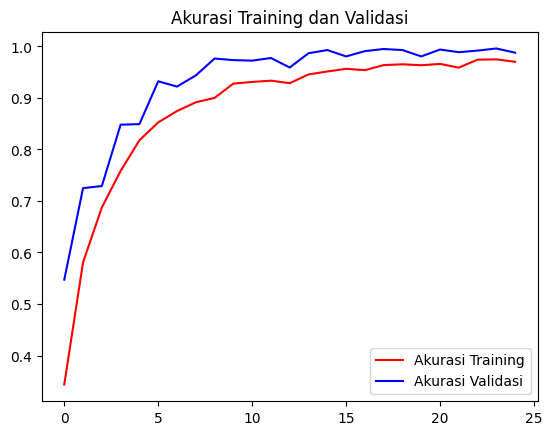

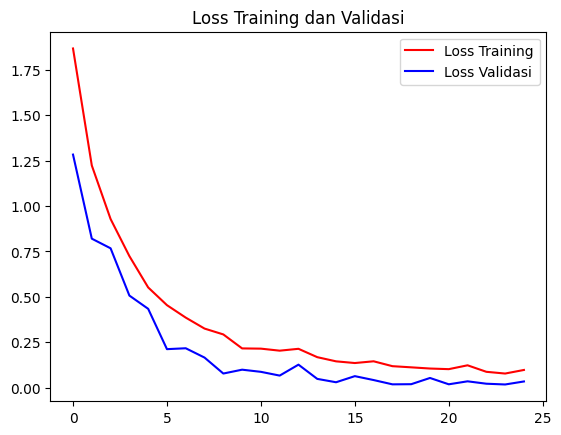

In [ ]:
# Plot akurasi dan loss dari setiap epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Training dan Validasi')
plt.legend()

plt.show()

In [ ]:
print(train_generator.class_indices)

{'Bedugul': 0, 'Garuda Wisnu Kencana': 1, 'Ground Zero': 2, 'Monumen Bajra Sandi': 3, 'Patung Dewa Ruci': 4, 'Patung Nakula Sadewa': 5, 'Patung Satria Gatotkaca': 6, 'Tanah Lot': 7, 'Vihara Dharma Giri': 8}


Saving 7f54c611506d95b5c51063595f067bfd.jpg to 7f54c611506d95b5c51063595f067bfd.jpg
1/1 [==============================] - 0s 20ms/step
Patung Satria Gatotkaca


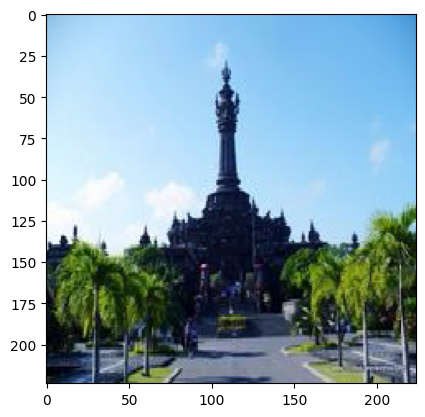

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(224,224))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  

if classes[0,0] != 0:
    print('Bedugul')
elif classes[0,1] != 0:
    print('Garuda Wisnu Kencana')
elif classes[0,2] != 0:
    print('Graound Zero')
elif classes[0,3] != 0:
    print('Monumen Bajra Sandhi')
elif classes[0,4] != 0:
    print('Patung Dewa Ruci')
elif classes[0,5] != 0:
    print('Patung Nakula Sadewa')
elif classes[0,6] != 0:
    print('Garuda Wisnu Kencana')
elif classes[0,7] != 0:
    print('Tanah Lot')
else:
    print('Vihara Dharma Giri')

In [ ]:
#Simpan model akhir
model.save("model_cnn_TravelLens.h5")
tf.keras.models.save_model(model,'model_cnn_TravelLens.hdf5')

In [ ]:
#Convert ke TF Lite
import tensorflow as tf

#Load model yang telah disimpah
final_model = tf.keras.models.load_model(filepath="model_cnn_TravelLens.h5")

#Convert model tsb ke bentuk TF Lite
conversion = tf.lite.TFLiteConverter.from_keras_model(final_model)
model_tflite = conversion.convert()

#Simpan TF Lite model.
with tf.io.gfile.GFile('model_cnn_TravelLens', 'wb') as f:
  f.write(model_tflite)

In [ ]:
#Simpan juga model akhir dalam bentuk json

model_json = model.to_json()
with open("model_json", "w") as file_json:
    file_json.write(model_json)

# Deploy With Gradio

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediksi=model.predict(img_4d)[0]
  class_names = ['Ground Zero','Garuda Wisnu Kencana', 'Patung Satria Gatotkaca','Monumen Bajra Sandi','Bedugul','Patung Nakula Sadewa','Patung Dewa Ruci','Vihara Dharma Giri','Tanah Lot']
  return {class_names[i]: float(prediksi[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(224,224), image_mode='RGB', invert_colors=False, source="upload")
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug='True')